In [1]:
from plugins.environments.awa_environment import AWAEnvironment
from plugins.interfaces.awa_interface import AWAInterface

# import data from csv file
import pandas as pd
variable_file = "plugins/environments/awa_variables.csv"
observable_file = "plugins/environments/awa_observables.csv"
variable_info = pd.read_csv(variable_file).set_index("NAME")
observable_info = pd.read_csv(observable_file).set_index("NAME").T

variables = variable_info[["MIN","MAX"]].T.to_dict()
observables = list(observable_info.keys())

for name in variables:
    variables[name] = [variables[name]["MIN"], variables[name]["MAX"]]
observables

env = AWAEnvironment(variable_file, observable_file, interface=AWAInterface(), target_charge=1.0)

In [2]:
from xopt import Xopt, Evaluator, VOCS
from xopt.generators.bayesian import BayesianExplorationGenerator
from xopt.generators.bayesian.options import BayesianOptions, ModelOptions
from model import StandardModelConstructor

import time

def evaluate(inputs):
    env.set_variables(inputs)
    time.sleep(2.0)
    return env.get_observables(["13ARV1:Sx"])

# use only one variable
variables = dict((name, env.variables[name]) for name in ["AWA:Bira3Ctrl:Ch04"])
vocs = VOCS(variables=variables,
            objectives={"13ARV1:Sx":"MINIMIZE"},
            constraints={"13ARV1:penalty":["LESS_THAN",0.0]})

model_constructor = StandardModelConstructor
model_options = ModelOptions(custom_constructor=model_constructor, use_low_noise_prior=False)
model_options.dict()


{'name': 'standard',
 'custom_constructor': model.StandardModelConstructor,
 'use_low_noise_prior': False,
 'covar_modules': {},
 'mean_modules': {}}

In [3]:
options = BayesianOptions(model=model_options)


generator = BayesianExplorationGenerator(vocs, options=options)
evaluator = Evaluator(function=evaluate)
X = Xopt(vocs=vocs, evaluator=evaluator, generator=generator)

using custom constructor


In [4]:
X


            Xopt
________________________________
Version: 1.3.1
Data size: 0
Config as YAML:
xopt: {asynch: false, strict: false, dump_file: null, max_evaluations: null}
generator:
  name: bayesian_exploration
  optim: {num_restarts: 20, raw_samples: 20, sequential: true, max_travel_distances: null,
    use_turbo: false}
  acq: {proximal_lengthscales: null, use_transformed_proximal_weights: true, monte_carlo_samples: 128}
  model:
    name: standard
    custom_constructor: model.StandardModelConstructor
    use_low_noise_prior: false
    covar_modules: {}
    mean_modules: {}
  n_initial: 3
  use_cuda: false
evaluator:
  function: __main__.evaluate
  max_workers: 1
  function_kwargs: {}
  vectorized: false
vocs:
  variables:
    AWA:Bira3Ctrl:Ch04: [-5.0, 5.0]
  constraints:
    13ARV1:penalty: [LESS_THAN, 0.0]
  objectives: {'13ARV1:Sx': MINIMIZE}
  constants: {}
  linked_variables: {}


In [5]:
# get the current quad setpoint
#current_val = env.get_variables(['AWA:Bira3Ctrl:Ch03'])
current_val = {'AWA:Bira3Ctrl:Ch04': [0.0, 0.1, 1.0, 2.0]}

In [6]:
# evaluate that point in xopt
X.evaluate_data(pd.DataFrame(current_val))

CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArrayData", Connecting to: awa5:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Apr 27 2023 16:42:33.721623473
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize0_RBV", Connecting to: awa5:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Apr 27 2023 16:42:33.721725022
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize1_RBV", Connecting to: awa5:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Apr 27 2023 16:42:33.722624341
..................................................................
CA.Client.Exception........

,AWA:Bira3Ctrl:Ch04,13ARV1:Sx,13ARV1:image1:ArraySize0_RBV,13ARV1:image1:ArraySize1_RBV,AWAVXI11ICT:Ch1,13ARV1:Cx,13ARV1:Cy,13ARV1:Sy,13ARV1:penalty,xopt_runtime,xopt_error
1,0.0,13.749811,1920,1200,9.436998e-10,552.445900,398.341225,98.447457,-190.927854,7.116876,False
2,0.1,11.467449,1920,1200,9.204087e-10,553.234977,412.221699,96.967713,-208.170471,7.053062,False
3,1.0,14.069210,1920,1200,9.039754e-10,557.049438,500.904992,61.702882,-349.301177,7.057240,False
4,2.0,40.327361,1920,1200,1.008462e-09,559.470445,592.936693,22.091061,-303.947375,7.051994,False


In [16]:
# run exploration
n_steps = 10
for i in range(n_steps):
    print(i)
    X.step()
    

0
charge value 0.8687535906606472 is outside bounds
1
charge value 0.6887536257412604 is outside bounds
2
charge value 0.8932025132899676 is outside bounds
charge value 0.8150073160798149 is outside bounds
3
4
charge value 0.7236090738375197 is outside bounds
charge value 1.5559218135155883 is outside bounds
5
charge value 1.1306166855755715 is outside bounds
charge value 0.8181334524686997 is outside bounds
charge value 0.877031115659928 is outside bounds
charge value 0.8064524086168977 is outside bounds
6
7
charge value 0.7081905714659256 is outside bounds
8
9
charge value 0.7632726047158034 is outside bounds
charge value 0.7528210496281414 is outside bounds


In [17]:
X.data

,AWA:Bira3Ctrl:Ch04,13ARV1:Sx,13ARV1:image1:ArraySize0_RBV,13ARV1:image1:ArraySize1_RBV,AWAVXI11ICT:Ch1,13ARV1:Cx,13ARV1:Cy,13ARV1:Sy,13ARV1:penalty,xopt_runtime,xopt_error,grad,int_grad,sx_m
1,0.000000,13.749811,1920,1200,9.436998e-10,552.445900,398.341225,98.447457,-190.927854,7.116876,False,0.000000,0.000000,0.000539
2,0.100000,11.467449,1920,1200,9.204087e-10,553.234977,412.221699,96.967713,-208.170471,7.053062,False,0.089300,0.107160,0.000450
3,1.000000,14.069210,1920,1200,9.039754e-10,557.049438,500.904992,61.702882,-349.301177,7.057240,False,0.893000,1.071600,0.000552
4,2.000000,40.327361,1920,1200,1.008462e-09,559.470445,592.936693,22.091061,-303.947375,7.051994,False,1.786000,2.143200,0.001582
5,-5.000000,NaN,1920,1200,1.079404e-09,NaN,NaN,NaN,1000.000000,12.103349,False,-4.465000,-5.358000,NaN
6,5.000000,NaN,1920,1200,1.053098e-09,NaN,NaN,NaN,63.299680,22.210491,False,4.465000,5.358000,NaN
7,3.387743,76.856117,1920,1200,9.180978e-10,563.551016,717.203385,29.953487,-147.872934,7.055040,False,3.025255,3.630306,0.003015
8,4.304010,88.350083,1920,1200,1.063232e-09,561.182786,797.832266,54.962474,-27.925595,7.055503,False,3.843481,4.612177,0.003466
9,-0.595100,26.402233,1920,1200,9.262600e-10,551.602131,338.199890,118.044006,-88.641645,7.052773,False,-0.531425,-0.637709,0.001036
10,2.701142,61.238060,1920,1200,1.038219e-09,565.123078,656.896932,6.537799,-246.851584,17.157651,False,2.412120,2.894544,0.002403


<Axes: xlabel='AWA:Bira3Ctrl:Ch04'>

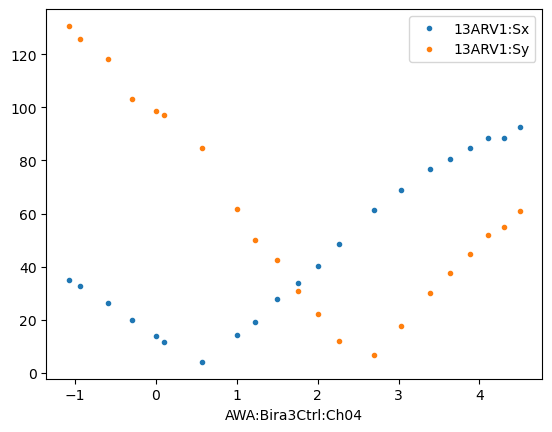

In [18]:
X.data.plot(x="AWA:Bira3Ctrl:Ch04",y=["13ARV1:Sx","13ARV1:Sy"],style=".")

<Axes: xlabel='AWA:Bira3Ctrl:Ch04'>

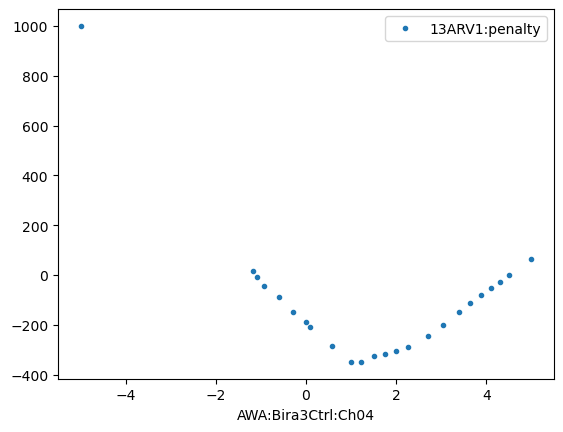

In [19]:
X.data.plot(x="AWA:Bira3Ctrl:Ch04",y=["13ARV1:penalty"],style=".")

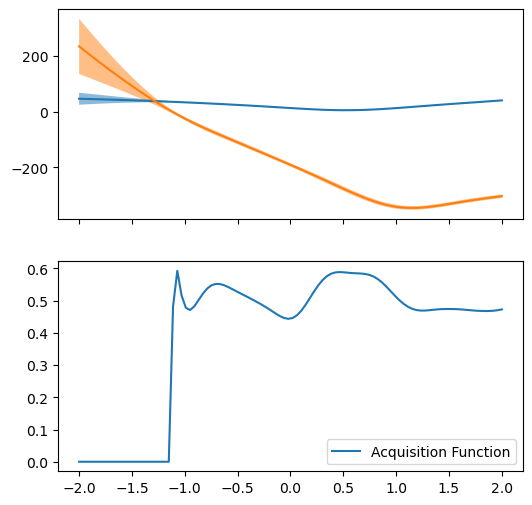

In [20]:
import torch
import matplotlib.pyplot as plt
test_x = torch.linspace(-2,2, 100)
model = X.generator.train_model()

fig,ax = plt.subplots(2,1, sharex="all")
fig.set_size_inches(6,6)
with torch.no_grad():
    post = model.posterior(test_x.reshape(-1,1,1).double())
    for i in range(post.event_shape[-1]):
        mean = post.mean[...,i].squeeze()
        l,u = post.mvn.confidence_region()
        ax[0].plot(test_x, mean,f"C{i}", label=generator.vocs.output_names[i])
        ax[0].fill_between(test_x, l[...,i].squeeze(), u[...,i].squeeze(), alpha=0.5)


    acq = generator.get_acquisition(model)(test_x.reshape(-1,1,1).double())

    ax[1].plot(test_x, acq, label='Acquisition Function')
    ax[1].legend()

In [21]:
from emitopt.utils import get_valid_emittance_samples
beam_energy = 45*10**-3 # GeV 
q_len = 0.12 # m
distance = 1.33-0.265 #m

data = X.data

data["grad"] = data["AWA:Bira3Ctrl:Ch04"] * 100*8.93e-3
data["int_grad"] = data["grad"]*q_len*10

data["sx_m"] = 3.9232781168265036e-05 * data["13ARV1:Sx"]

data


,AWA:Bira3Ctrl:Ch04,13ARV1:Sx,13ARV1:image1:ArraySize0_RBV,13ARV1:image1:ArraySize1_RBV,AWAVXI11ICT:Ch1,13ARV1:Cx,13ARV1:Cy,13ARV1:Sy,13ARV1:penalty,xopt_runtime,xopt_error,grad,int_grad,sx_m
1,0.000000,13.749811,1920,1200,9.436998e-10,552.445900,398.341225,98.447457,-190.927854,7.116876,False,0.000000,0.000000,0.000539
2,0.100000,11.467449,1920,1200,9.204087e-10,553.234977,412.221699,96.967713,-208.170471,7.053062,False,0.089300,0.107160,0.000450
3,1.000000,14.069210,1920,1200,9.039754e-10,557.049438,500.904992,61.702882,-349.301177,7.057240,False,0.893000,1.071600,0.000552
4,2.000000,40.327361,1920,1200,1.008462e-09,559.470445,592.936693,22.091061,-303.947375,7.051994,False,1.786000,2.143200,0.001582
5,-5.000000,NaN,1920,1200,1.079404e-09,NaN,NaN,NaN,1000.000000,12.103349,False,-4.465000,-5.358000,NaN
6,5.000000,NaN,1920,1200,1.053098e-09,NaN,NaN,NaN,63.299680,22.210491,False,4.465000,5.358000,NaN
7,3.387743,76.856117,1920,1200,9.180978e-10,563.551016,717.203385,29.953487,-147.872934,7.055040,False,3.025255,3.630306,0.003015
8,4.304010,88.350083,1920,1200,1.063232e-09,561.182786,797.832266,54.962474,-27.925595,7.055503,False,3.843481,4.612177,0.003466
9,-0.595100,26.402233,1920,1200,9.262600e-10,551.602131,338.199890,118.044006,-88.641645,7.052773,False,-0.531425,-0.637709,0.001036
10,2.701142,61.238060,1920,1200,1.038219e-09,565.123078,656.896932,6.537799,-246.851584,17.157651,False,2.412120,2.894544,0.002403


torch.Size([21, 1])
torch.Size([21, 1])


/home/awa/miniconda3/envs/awa-badger/lib/python3.9/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


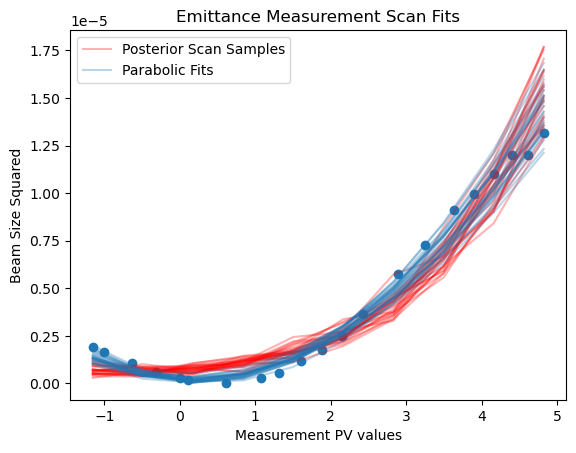

In [22]:
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.priors import GammaPrior
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from gpytorch import ExactMarginalLogLikelihood

from botorch.models.gp_regression import SingleTaskGP
from botorch.models.transforms import Normalize, Standardize
from botorch.fit import fit_gpytorch_mll

train_x = torch.tensor(data.dropna()["int_grad"].to_numpy()).double().unsqueeze(1)
train_y = torch.tensor(data.dropna()["sx_m"].to_numpy()).double().unsqueeze(1)

print(train_x.shape)
print(train_y.shape)
input_transform = Normalize(1)
outcome_transform = Standardize(1)
covar_module = ScaleKernel(PolynomialKernel(power=2))
#covar_module = MaternKernel()

model = SingleTaskGP(train_x, 
                     train_y, 
                     input_transform=input_transform,
                     outcome_transform=outcome_transform, 
                     covar_module = covar_module
                     )

mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_mll(mll)


(emits_at_target_valid,
 emits_sq_at_target,
 is_valid,
 sample_validity_rate) = get_valid_emittance_samples(model, beam_energy,
                                                     q_len,
                                                     distance, n_samples=50, n_steps_quad_scan=10, visualize=True)

Text(0, 0.5, 'Probability Density')

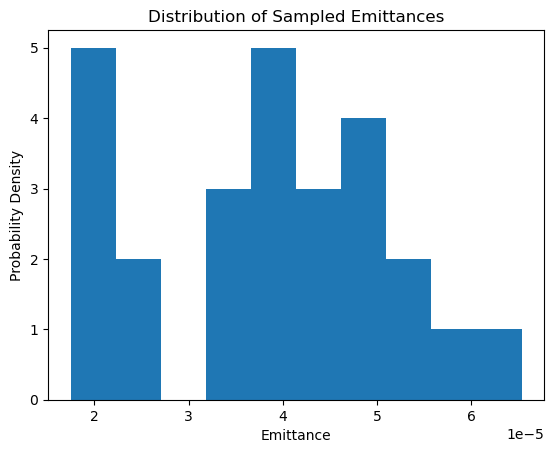

errlog: 4 messages were discarded
CA.Client.Exception...............................................
    Context: "192.168.0.166:5064"
    Source File: ../tcpiiu.cpp line 926
    Current Time: Thu Apr 27 2023 17:08:42.598230593
..................................................................


In [23]:
plt.hist(emits_at_target_valid.flatten()*90)
plt.title('Distribution of Sampled Emittances')
plt.xlabel('Emittance')
plt.ylabel('Probability Density')